<a href="https://colab.research.google.com/github/Ansubasnet-creator/2510322_ansu/blob/main/Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


In [3]:
df = pd.read_csv('/content/drive/MyDrive/diabetes_.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero:
    df[col] = df[col].replace(0, df[col].median())


In [8]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values


In [7]:
def train_test_split(X, y, test_size=0.3):
    n = len(X)
    indices = np.random.permutation(n)
    test_count = int(n * test_size)

    test_idx = indices[:test_count]
    train_idx = indices[test_count:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [10]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


In [11]:
def knn_predict_single(X_train, y_train, x_test, k):
    distances = []

    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], x_test)
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]

    labels = [label for _, label in k_nearest]
    return max(set(labels), key=labels.count)


In [12]:
def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for x in X_test:
        predictions.append(knn_predict_single(X_train, y_train, x, k))
    return np.array(predictions)


In [13]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)


In [14]:
k = 5
start = time.time()

y_pred = knn_predict(X_train, y_train, X_test, k)
acc_original = accuracy(y_test, y_pred)

time_original = time.time() - start

acc_original, time_original


(np.float64(0.7521739130434782), 0.8346548080444336)

In [15]:
def standardize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

X_scaled = standardize(X)


In [16]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y)


In [17]:
start = time.time()

y_pred_s = knn_predict(X_train_s, y_train_s, X_test_s, k)
acc_scaled = accuracy(y_test_s, y_pred_s)

time_scaled = time.time() - start

acc_scaled, time_scaled


(np.float64(0.7260869565217392), 0.8066267967224121)

In [19]:
k_values = range(1, 16)

acc_orig, acc_scl = [], []
time_orig, time_scl = [], []

for k in k_values:
    # Original
    start = time.time()
    y_p = knn_predict(X_train, y_train, X_test, k)
    time_orig.append(time.time() - start)
    acc_orig.append(accuracy(y_test, y_p))

    # Scaled
    start = time.time()
    y_ps = knn_predict(X_train_s, y_train_s, X_test_s, k)
    time_scl.append(time.time() - start)
    acc_scl.append(accuracy(y_test_s, y_ps))


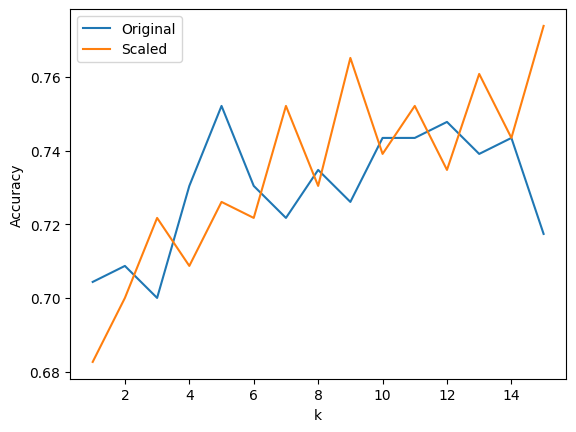

In [20]:
plt.figure()
plt.plot(k_values, acc_orig, label='Original')
plt.plot(k_values, acc_scl, label='Scaled')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [21]:
best_k_original = k_values[np.argmax(acc_orig)]
best_k_scaled = k_values[np.argmax(acc_scl)]

best_k_original, best_k_scaled


(5, 15)

In [22]:
"""
Challenges of KNN:
- Slow for large datasets
- High memory usage
- Curse of dimensionality

Efficiency Improvements:
- KD-Trees / Ball Trees
- Approximate Nearest Neighbors
- Dimensionality Reduction (PCA)
- Feature scaling
"""


'\nChallenges of KNN:\n- Slow for large datasets\n- High memory usage\n- Curse of dimensionality\n\nEfficiency Improvements:\n- KD-Trees / Ball Trees\n- Approximate Nearest Neighbors\n- Dimensionality Reduction (PCA)\n- Feature scaling\n'